<a href="https://colab.research.google.com/github/Madhuvod/AI-Rover/blob/main/computervision_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nividia-smi

/bin/bash: line 1: nividia-smi: command not found


In [2]:
import torch
import os
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [3]:
import os
import torch
from torch import nn

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



train_data = datasets.FashionMNIST(root = "data",
                      train = True,
                      download = True,
                      transform = ToTensor(),
                      target_transform = None
                      )
test_data = datasets.FashionMNIST(root ="data",
                                  train = False,
                                  download = True,
                                  transform =ToTensor()
                                  )

100%|██████████| 26421880/26421880 [00:03<00:00, 8600601.32it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138766.85it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:05<00:00, 750194.14it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5184220.17it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

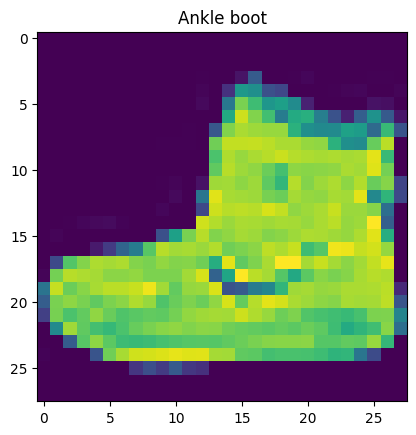

In [7]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(class_names[label])

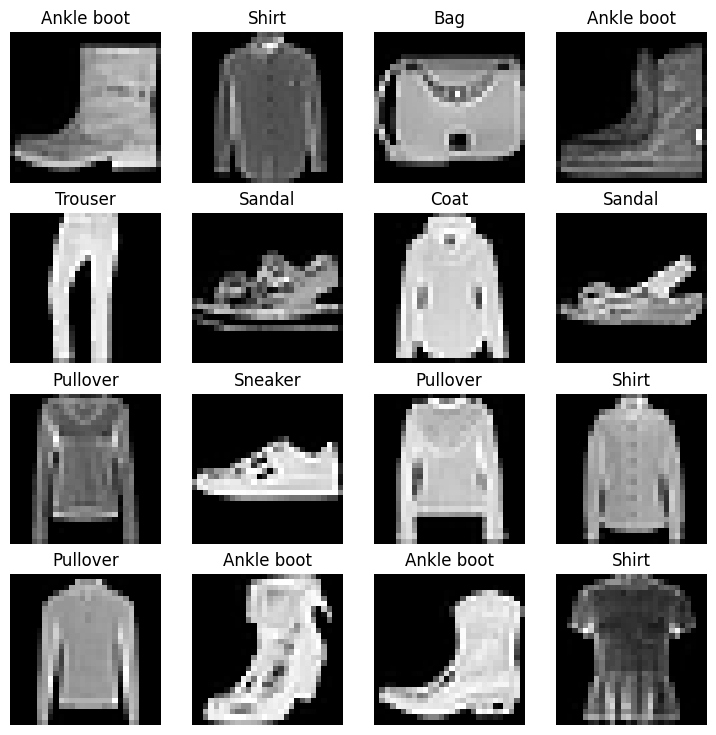

In [8]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  randint = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[randint]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [9]:
# prepare a dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataLoader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataLoader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)


In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataLoader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'Shirt')

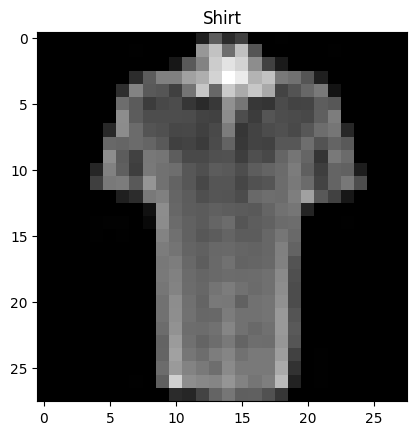

In [11]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])

In [12]:
#creating a baseline model

flatten_layer = nn.Flatten()

x = train_features_batch[0]

output = flatten_layer(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [13]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


In [14]:
torch.manual_seed(42)
model_0 = FashionMNISTV0(input_shape = 784, hidden_units=10, output_shape=len(class_names))
model_0.to("cpu")

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [3]:
#loss and optimizer, accuracy
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("it already exists")
else:
  print("downloading it right now..")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


downloading it right now..


In [16]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr= 0.1)

In [4]:
from timeit import default_timer as timer
def print_train_timer(start: float, end: float, device: torch.device = None):
  total_time = end - start
  return total_time

In [18]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataLoader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataLoader)

  test_loss, test_acc =0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataLoader:
      test_preds = model_0(X)
      test_loss += loss_fn(test_preds, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_preds.argmax(dim=1))
    test_loss /= len(test_dataLoader)
    test_acc /= len(test_dataLoader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_timer(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]


Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%


Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%


Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%



In [19]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_preds = model(X)
      loss += loss_fn(y_preds, y)
      acc += accuracy_fn(y_true= y, y_pred = y_preds.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
model_0_results = eval_model(model=model_0,
                             data_loader= test_dataLoader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [6]:
import torch
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'gpu'

In [21]:
#6 model with gpu
class FashionMNISTV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU(),
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [22]:
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
)


In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

In [24]:
def train_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_preds = model(X)
    loss = loss_fn(y_preds, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"the total loss: {train_loss: .5f} and accuracy is {train_acc: .2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():

    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"the total loss: {test_loss: .5f} and accuracy is {test_acc: .2f}%")






In [51]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
             data_loader= train_dataLoader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer)
  test_step(model=model_1,
            data_loader= test_dataLoader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
train_time_end_on_cpu = timer()
train_time_model_1 = print_train_timer(start=train_time_start_on_cpu, end= train_time_end_on_cpu, device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

the total loss:  0.64302 and accuracy is  76.43%
the total loss:  0.68500 and accuracy is  75.02%
the total loss:  0.64302 and accuracy is  76.43%
the total loss:  0.68500 and accuracy is  75.02%
the total loss:  0.64302 and accuracy is  76.43%
the total loss:  0.68500 and accuracy is  75.02%


In [7]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [27]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [29]:
#convolution NN (model)
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape:int):
    super().__init__()
    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.layer_2 = nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
    return self.classifier(self.layer_2(self.layer_1(x)))
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape = len(class_names)).to(device)
model_2



FashionMNISTModelV2(
  (layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [38]:
torch.manual_seed(42)

images = torch.rand(size=(32,3,64,64))
test_image = images[0]

conv_2d = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_2d(test_image)

tensor([[[-0.4432, -0.4266, -0.7313,  ..., -0.3842, -0.4029, -0.2580],
         [-0.5172, -0.6280, -0.5067,  ..., -0.5455, -0.2697, -0.3392],
         [-0.6129, -0.4303, -0.3513,  ..., -0.2895, -0.3527, -0.5661],
         ...,
         [-0.4673, -0.3827, -0.3777,  ..., -0.5011, -0.5698, -0.2990],
         [-0.3849, -0.4654, -0.5875,  ..., -0.7656, -0.4689, -0.4657],
         [-0.5404, -0.1720, -0.1813,  ..., -0.7557, -0.5228, -0.5067]],

        [[-0.5316, -0.1805, -0.3830,  ..., -0.3040,  0.1747, -0.1271],
         [-0.0159, -0.2488, -0.2986,  ..., -0.0356, -0.2788, -0.3086],
         [-0.2891, -0.4163, -0.3072,  ..., -0.2823, -0.1784, -0.3035],
         ...,
         [-0.3779, -0.1186, -0.1976,  ..., -0.0708, -0.1470, -0.2759],
         [ 0.0127,  0.0269, -0.0898,  ..., -0.1350, -0.1111, -0.4801],
         [-0.3296,  0.0213,  0.0134,  ..., -0.3110, -0.2932, -0.3754]],

        [[ 0.4062,  0.3490,  0.5550,  ...,  0.5446,  0.4686,  0.3256],
         [ 0.5676,  0.5045,  0.5234,  ...,  0

In [43]:
test_image.shape
avg_pool = nn.AvgPool2d(kernel_size=3)
avg_tensor = avg_pool(test_image)
avg_tensor.shape

torch.Size([3, 21, 21])

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [46]:
torch.manual_seed(42)
from timeit import default_timer as timer

train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_2,
             data_loader=train_dataLoader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataLoader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_2 = timer()

total_train_time = print_train_timer(start=train_time_start_model_2,
                                     end = train_time_end_model_2,
                                     device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

the total loss:  0.69618 and accuracy is  74.61%
the total loss:  0.40008 and accuracy is  86.02%
the total loss:  0.36797 and accuracy is  86.64%
the total loss:  0.34821 and accuracy is  87.22%
the total loss:  0.32889 and accuracy is  88.09%
the total loss:  0.32422 and accuracy is  88.12%


In [48]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataLoader,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32421666383743286,
 'model_acc': 88.11900958466454}

In [49]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTV0,0.476639,83.426518
1,FashionMNISTV1,0.685001,75.019968
2,FashionMNISTModelV2,0.324217,88.119010


In [52]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    train_time_model_1,
                                    total_train_time]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTV0,0.476639,83.426518,36.998000
1,FashionMNISTV1,0.685001,75.019968,36.278659
2,FashionMNISTModelV2,0.324217,88.119010,166.918068


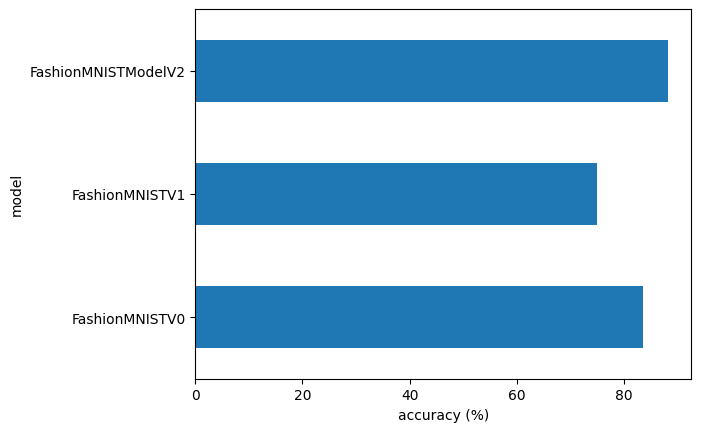

In [56]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [8]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [9]:
train_data = datasets.FashionMNIST(root= "data",
                            train= True,
                            download= True,
                            transform= ToTensor(),
                            target_transform=None)
test_data = datasets.FashionMNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 10638549.42it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 165724.95it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 536595.62it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22055441.26it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [10]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

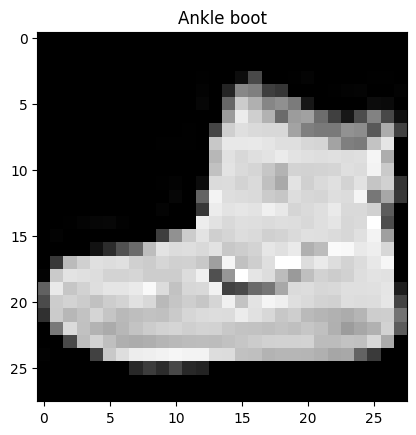

In [12]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])


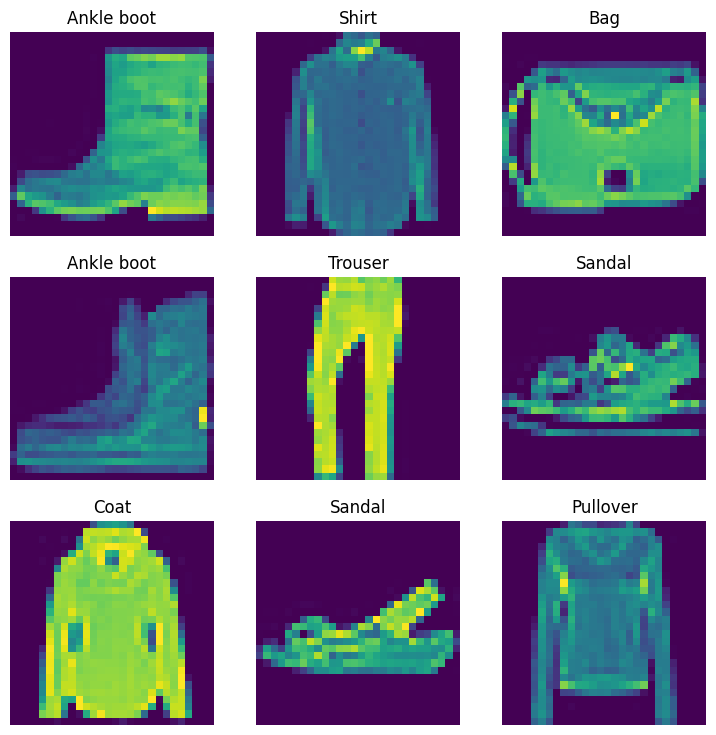

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row, col = 3,3
for i in range(1, row * col + 1):
  rand_int = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[rand_int]
  fig.add_subplot(row, col, i)
  plt.imshow(image.squeeze())
  plt.title(class_names[label])
  plt.axis(False)

In [14]:
len(train_data), len(test_data)

(60000, 10000)

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)


In [16]:
train_features, train_labels = next(iter(train_dataloader))
train_features.shape, train_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Text(0.5, 1.0, 'T-shirt/top')

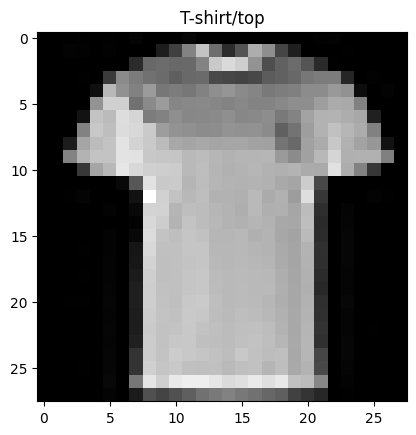

In [17]:
torch.manual_seed(43)
rand_int = torch.randint(1, len(train_features), size=[1]).item()
img, lab = train_features[rand_int], train_labels[rand_int]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[lab])

In [24]:
#model
from torch import nn
class FashionMNISTModelV4(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=2, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x):
    return self.classifier(self.layer_2(self.layer_1(x)))
model_3 = FashionMNISTModelV4(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_3.to(device="gpu")

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, ort, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: gpu

In [19]:
import torch
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'gpu'

In [21]:

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)

In [22]:
def train_step(model: torch.nn.Module,
               loss_fn: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_preds = model(X)
    loss = loss_fn(y_preds, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"the total loss: {train_loss: .5f} and accuracy is {train_acc: .2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():

    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"the total loss: {test_loss: .5f} and accuracy is {test_acc: .2f}%")





In [23]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm


train_time_start_model_3 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model=model_3,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)
  test_step(model=model_3,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_model_3 = timer()

total_train_time = print_train_timer(start=train_time_start_model_3,
                                     end = train_time_end_model_3,
                                     device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, ort, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: gpu

In [27]:
tensor_1 = torch.rand([1, 3, 64, 64])
tensor_1

tensor([[[[0.4504, 0.9838, 0.9265,  ..., 0.2795, 0.7262, 0.4516],
          [0.9924, 0.1133, 0.2085,  ..., 0.1666, 0.3756, 0.8896],
          [0.4108, 0.2829, 0.2839,  ..., 0.5503, 0.6651, 0.4823],
          ...,
          [0.4458, 0.4727, 0.0242,  ..., 0.4908, 0.9525, 0.5041],
          [0.4802, 0.0261, 0.2586,  ..., 0.3334, 0.5835, 0.1320],
          [0.7970, 0.1449, 0.7737,  ..., 0.8492, 0.8611, 0.6500]],

         [[0.6455, 0.1207, 0.3881,  ..., 0.1688, 0.6898, 0.8474],
          [0.4023, 0.5140, 0.1366,  ..., 0.7127, 0.8141, 0.5684],
          [0.5998, 0.9299, 0.2285,  ..., 0.0075, 0.3366, 0.2438],
          ...,
          [0.3916, 0.2284, 0.4685,  ..., 0.9980, 0.1477, 0.0614],
          [0.0100, 0.2025, 0.8345,  ..., 0.5048, 0.9745, 0.9537],
          [0.8940, 0.2340, 0.9958,  ..., 0.7661, 0.5163, 0.4594]],

         [[0.2782, 0.7706, 0.0620,  ..., 0.7579, 0.0041, 0.9404],
          [0.7973, 0.4056, 0.3433,  ..., 0.9561, 0.6586, 0.2758],
          [0.8349, 0.4436, 0.3460,  ..., 0